<a href="https://colab.research.google.com/github/samridhi0302/diabetes-prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "samridhi1"
os.environ["KAGGLE_KEY"] = "04d85f855b7a0f3c222b1f5e5c56b87d"

!kaggle datasets download iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 62.2MB/s]


In [2]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/diabetes-prediction-dataset.zip
/content/diabetes_prediction_dataset.csv
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/logs/2023.10.03/13.24.45.667379.log
/content/.config/logs/2023.10.03/13.25.12.399084.log
/content/.config/logs/2023.10.03/13.25.40.579693.log
/content/.config/logs/2023.10.03/13.25.30.924211.log
/content/.config/logs/2023.10.03/13.25.22.293658.log
/content/.config/logs/2023.10.03/13.25.41.386955.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.shape

(100000, 9)

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
df.duplicated().sum()

3854

In [13]:
data = df.drop_duplicates()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


<Axes: xlabel='diabetes', ylabel='count'>

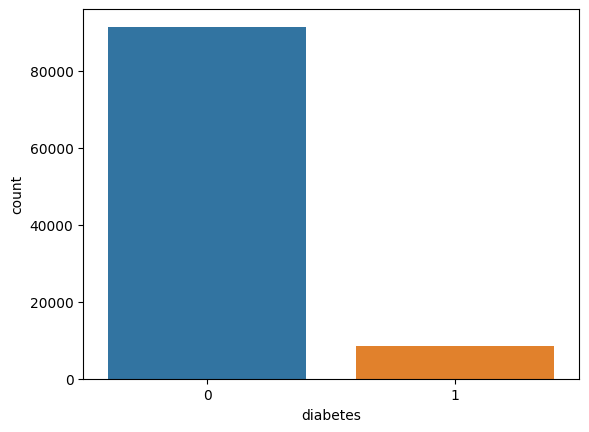

In [15]:
sns.countplot(x='diabetes',data=df)

<Axes: title={'center': 'Gender Distribution'}, xlabel='gender', ylabel='count'>

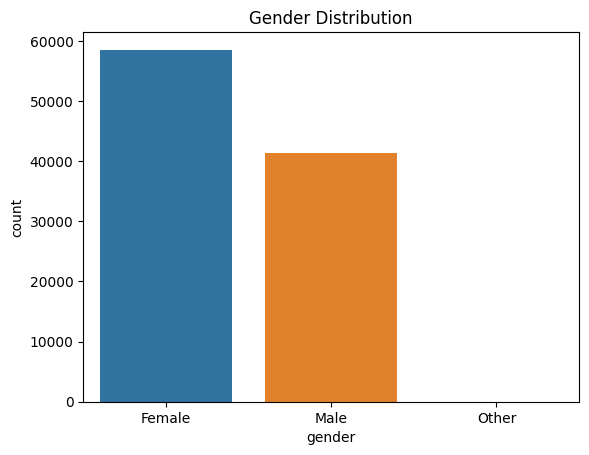

In [16]:
plt.title('Gender Distribution')
sns.countplot(x='gender',data=df)

<Axes: xlabel='diabetes', ylabel='count'>

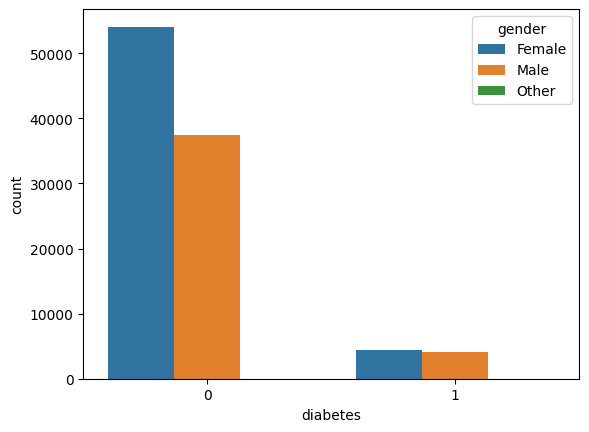

In [17]:
sns.countplot(x='diabetes',data=df,hue='gender')

<Axes: >

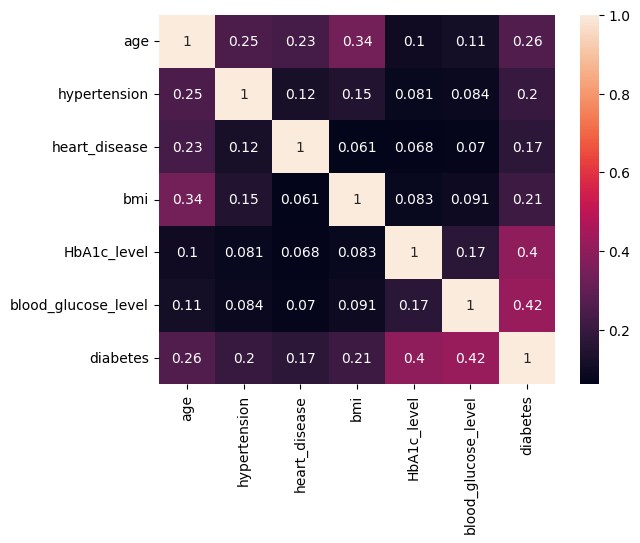

In [18]:
c=df.corr()
sns.heatmap(c,annot=True)

In [19]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [20]:
df.groupby('diabetes').mean()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


In [21]:
df['gender']=df['gender'].map({'Female':0,'Male':1,'Other':2})
df.drop('smoking_history',axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


In [23]:
df.corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,-0.022994,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


Text(0.5, 1.0, 'Blood Glucose')

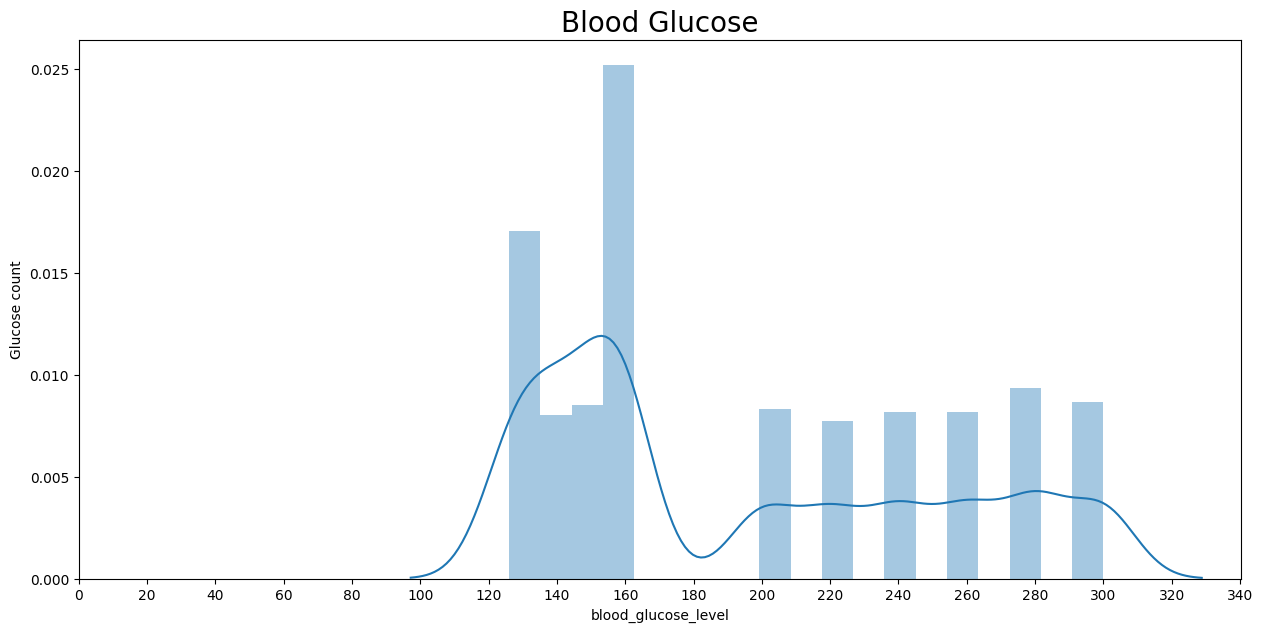

In [24]:
fig=plt.figure(figsize=(15,7))
sns.distplot(df["blood_glucose_level"][df["diabetes"]==1])
plt.xticks([i for i in range(0,350,20)])
plt.ylabel("Glucose count")
plt.title("Blood Glucose", fontsize=20)

Text(0.5, 1.0, 'BMI')

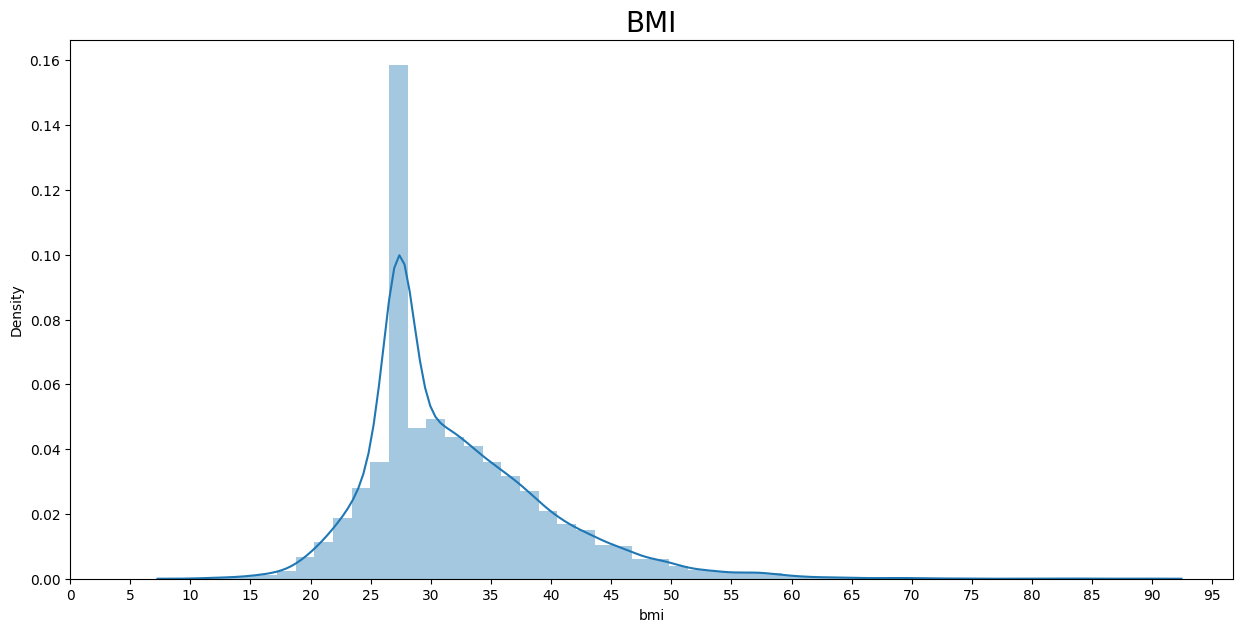

In [25]:
fig=plt.figure(figsize=(15,7))
sns.distplot(df["bmi"][df["diabetes"]==1])
plt.xticks([i for i in range(0,100,5)])

plt.title("BMI", fontsize=20)

Text(0.5, 1.0, 'Age')

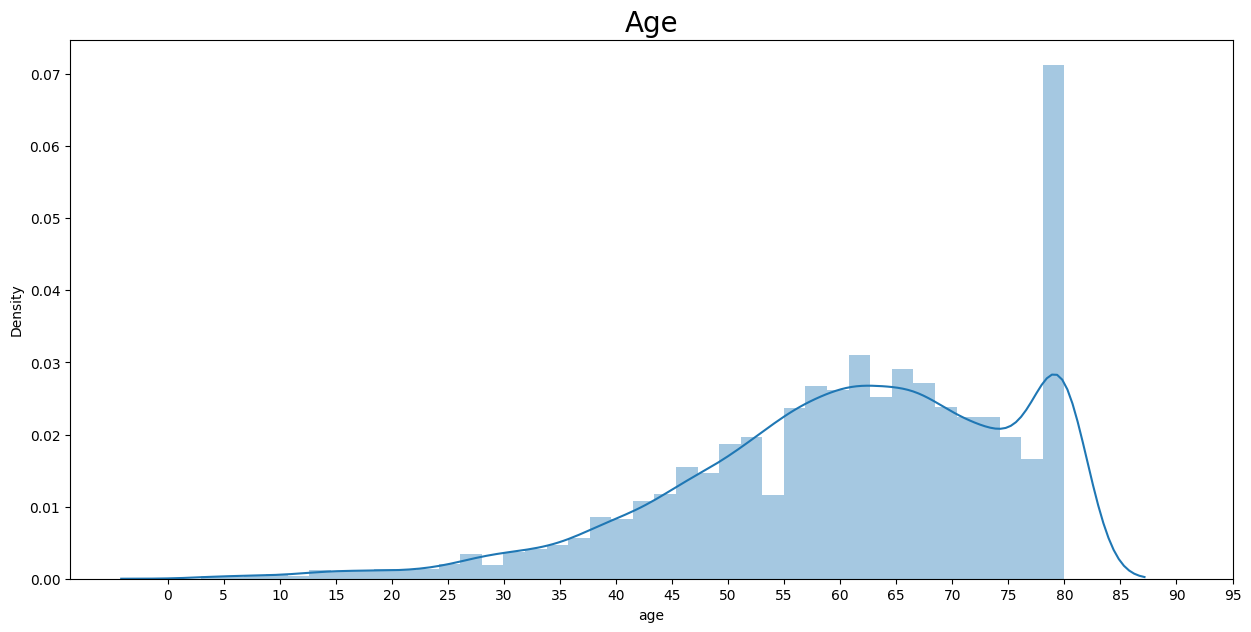

In [26]:
fig=plt.figure(figsize=(15,7))
sns.distplot(df["age"][df["diabetes"]==1])
plt.xticks([i for i in range(0,100,5)])

plt.title("Age", fontsize=20)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()
d=sc.fit_transform(df[['age','HbA1c_level','blood_glucose_level']])
df.drop(['age','HbA1c_level','blood_glucose_level'],axis=1,inplace=True)
d2=pd.DataFrame(d,columns=['age','HbA1c_level','blood_glucose_level'])
final=pd.concat([d2,df],axis=1)

In [29]:
final.head()

,age,HbA1c_level,blood_glucose_level,gender,hypertension,heart_disease,bmi,diabetes
0,1.692704,1.001706,0.047704,0,0,1,25.19,0
1,0.538006,1.001706,-1.426210,0,0,0,27.32,0
2,-0.616691,0.161108,0.489878,1,0,0,27.32,0
3,-0.261399,-0.492690,0.416183,0,0,0,23.45,0
4,1.515058,-0.679490,0.416183,1,1,1,20.14,0


In [30]:
!pip install xgboost==1.7.6
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.0
    Uninstalling xgboost-2.0.0:
      Successfully uninstalled xgboost-2.0.0


In [31]:
x=final.drop('diabetes',axis=1)
y=final['diabetes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='diabetes', ylabel='count'>

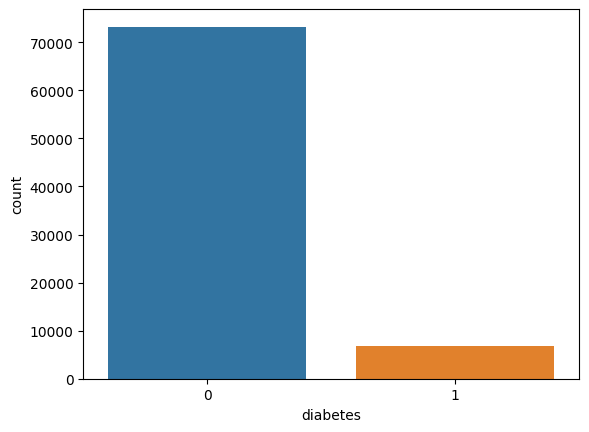

In [32]:
sns.countplot(x=y_train)

In [33]:
sm=SMOTE(sampling_strategy=0.3)
us=RandomUnderSampler(sampling_strategy=0.4)
x_train,y_train=sm.fit_resample(x_train,y_train)
x_train,y_train=us.fit_resample(x_train,y_train)

<Axes: xlabel='diabetes', ylabel='count'>

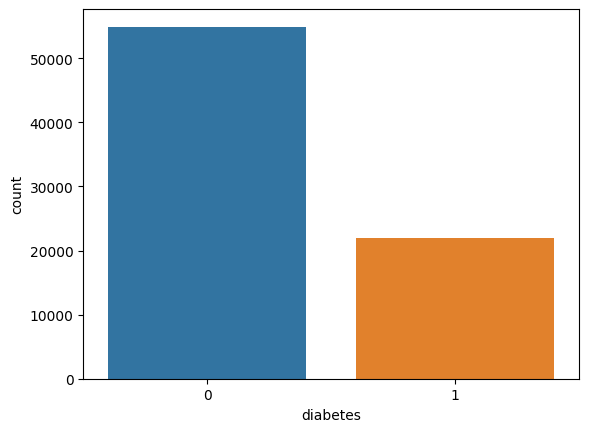

In [34]:
sns.countplot(x=y_train)

In [35]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
p = model1.predict(x_test)
print(classification_report(y_test,p))
print("Confusion matrix is:")
cm1=confusion_matrix(p,y_test)
print(cm1)
print("----------------------------------------------")
print("correct:",sum(p==y_test))
print("incorrect:",sum(p!=y_test))
print("accuracy:",sum(p==y_test)/len(p))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     18263
           1       0.59      0.79      0.68      1737

    accuracy                           0.93     20000
   macro avg       0.79      0.87      0.82     20000
weighted avg       0.95      0.93      0.94     20000

Confusion matrix is:
[[17326   365]
 [  937  1372]]
----------------------------------------------
correct: 18698
incorrect: 1302
accuracy: 0.9349


In [36]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
p = model2.predict(x_test)
print(classification_report(y_test,p))
print("Confusion matrix is:")
cm2=confusion_matrix(p,y_test)
print(cm2)
print("----------------------------------------------")
print("correct:",sum(p==y_test))
print("incorrect:",sum(p!=y_test))
print("accuracy:",sum(p==y_test)/len(p))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18263
           1       0.65      0.76      0.70      1737

    accuracy                           0.94     20000
   macro avg       0.81      0.86      0.84     20000
weighted avg       0.95      0.94      0.95     20000

Confusion matrix is:
[[17557   414]
 [  706  1323]]
----------------------------------------------
correct: 18880
incorrect: 1120
accuracy: 0.944


In [37]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)
p = model3.predict(x_test)
print(classification_report(y_test,p))
print("Confusion matrix is:")
cm3=confusion_matrix(p,y_test)
print(cm3)
print("----------------------------------------------")
print("correct:",sum(p==y_test))
print("incorrect:",sum(p!=y_test))
print("accuracy:",sum(p==y_test)/len(p))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18263
           1       0.80      0.75      0.77      1737

    accuracy                           0.96     20000
   macro avg       0.89      0.86      0.88     20000
weighted avg       0.96      0.96      0.96     20000

Confusion matrix is:
[[17945   439]
 [  318  1298]]
----------------------------------------------
correct: 19243
incorrect: 757
accuracy: 0.96215


In [38]:
model4=xgb.XGBClassifier()
model4.fit(x_train,y_train)
p = model4.predict(x_test)
print(classification_report(y_test,p))
print("Confusion matrix is:")
cm4=confusion_matrix(p,y_test)
print(cm4)
print("----------------------------------------------")
print("correct:",sum(p==y_test))
print("incorrect:",sum(p!=y_test))
print("accuracy:",sum(p==y_test)/len(p))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18263
           1       0.91      0.72      0.80      1737

    accuracy                           0.97     20000
   macro avg       0.94      0.86      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion matrix is:
[[18139   489]
 [  124  1248]]
----------------------------------------------
correct: 19387
incorrect: 613
accuracy: 0.96935


In [39]:
x_train.shape

(76898, 7)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=277, metric='minkowski')
knn.fit(x_train,y_train)
p = knn.predict(x_test)
print(classification_report(y_test,p))
print("Confusion matrix is:")
cm5=confusion_matrix(p,y_test)
print(cm5)
print("----------------------------------------------")
print("correct:",sum(p==y_test))
print("incorrect:",sum(p!=y_test))
print("accuracy:",sum(p==y_test)/len(p))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18263
           1       0.64      0.76      0.69      1737

    accuracy                           0.94     20000
   macro avg       0.81      0.86      0.83     20000
weighted avg       0.95      0.94      0.94     20000

Confusion matrix is:
[[17509   418]
 [  754  1319]]
----------------------------------------------
correct: 18828
incorrect: 1172
accuracy: 0.9414


In [41]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)
p=svc.predict(x_test)
print(classification_report(y_test,p))
print("Confusion matrix is:")
cm6=confusion_matrix(p,y_test)
print(cm6)
print("----------------------------------------------")
print("correct:",sum(p==y_test))
print("incorrect:",sum(p!=y_test))
print("accuracy:",sum(p==y_test)/len(p))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     18263
           1       0.62      0.78      0.69      1737

    accuracy                           0.94     20000
   macro avg       0.80      0.87      0.83     20000
weighted avg       0.95      0.94      0.94     20000

Confusion matrix is:
[[17423   375]
 [  840  1362]]
----------------------------------------------
correct: 18785
incorrect: 1215
accuracy: 0.93925


In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
p=gnb.predict(x_test)
print(classification_report(y_test,p))
print("Confusion matrix is:")
cm7=confusion_matrix(p,y_test)
print(cm7)
print("----------------------------------------------")
print("correct:",sum(p==y_test))
print("incorrect:",sum(p!=y_test))
print("accuracy:",sum(p==y_test)/len(p))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     18263
           1       0.45      0.74      0.56      1737

    accuracy                           0.90     20000
   macro avg       0.71      0.83      0.75     20000
weighted avg       0.93      0.90      0.91     20000

Confusion matrix is:
[[16695   456]
 [ 1568  1281]]
----------------------------------------------
correct: 17976
incorrect: 2024
accuracy: 0.8988


In [43]:
import pickle
pickle.dump(model4,open('model.pkl','wb'))

In [44]:

pickle.dump(model3,open('model2.pkl','wb'))